# Modelo de Hodgkin-Huxley

## Antecedentes históricos

- 1902.El fisiólogo alemán Julius Bernstein (1839-1917), desarrolló la teoría de membrana y del potencial eléctrico en las células y tejidos biológicos, en particular propuso que la membrana en reposo es permeable al ion $K^+$,

- 1895-1902.El biólogo y fisiólogo británico Ernest Overton  (1865-1933), demostró que la excitabilidad axonal se perdía si se empleaban soluciones electrolíticas sin sodio,

![](axon.png)

- 1909.El biólogo británico L.W. Williams descubrió el axón gigante de calamar (*The anatomy of the common squid, Loligo pealii*),

- 1925-1932.El primer microscopio electrónico fue diseñado por el físico alemán Ernst Ruska y el ingeniero alemán Max Knoll, quienes se basaron en los estudios de Louis-Victor de Broglie acerca de las propiedades ondulatorias de los electrones.

- 1936.El zoólogo John Z. Young (1907-1997) utilizó el axón de calamar en la cuantificación de los impulsos nerviosos,

- 1936-1940.Otro investigador llamado George Wald (1906-1997), Premio Nobel de Medicina y Fisiología en 1967 por sus estudios sobre la púrpura visual o rodopsina, utilizó el calamar de Young para sus investigaciones sobre la bioquímica de la visión

![](clamp.jpg)

- 1947.El concepto de técnica de fijación de voltaje es atribuído a Kenneth Cole y a George Marmont, puesto que estos investigadores lograron mantener el potencial de membrana fijo y así la medición de corrientes iónicas específicas. NOTA: NO EXISTÍAN LOS MICROELECTRODOS, los experimentos debieron hacerse en axones de calamar

- 1950.Se descubrió la bomba $Na^+-K^+$ ATPasa de membrana por un científico danés, Jens Christian Skou, que fue galardonado con el Premio Nobel en 1997. Recordar también a Ian Glynn de Cambridge que dedicó toda su vida a la caracterización de este sistema enzimático de trasporte de membrana.


## Hodgkin & Huxley

![](HH.jpg)

- La colaboración entre el biofísico y fisiólogo Alan Lloyd Huxley y el fisiólogo Sir Andrew Fielding Hodgkin comenzó en 1939. Los experimentos decisivos para conocer el flujo transmembranario de iones (potencial de acción) mediante una técnica revolucionaria, la **fijación del voltaje (voltaje clamp)**, permitieron calcular los valores de voltaje y conductancia. 

- Huxley demostró con el microscopio electrónico el acortamiento de los sarcómeros por el entrecruzamiento de los filamentos de miosina y de actina de la fibra muscular que habían sido descubiertos por Hugh Huxley. Las investigaciones de A. F. Huxley sentaron las bases para un mejor conocimiento de la contracción muscular.

- En 1952, Hodgkin y  Huxley escribieron una serie de cinco artículos en los que describieron los experimentos que realizaron para determinar las leyes del movimiento de los iones en las celulas nerviosas durante un potencial de acción.

- Formularon un modelo matemático para explicar el comportamiento de las celulas nerviosas de un calamar gigante.

- Recibieron el Premio Nobel en Fisiología o Medicina en 1963, junto con el australiano Sir John C. Eccles por sus descubrimientos referentes a los mecanismos iónicos implicados en la excitación y la inhibición en las porciones periféricas y centrales de la membrana de la célula nerviosa (sinápsis).


## El modelo eléctrico

El potencial de acción de una neurona ocurre debido a las variaciones de la corrientes iónicas de sodio y potasio entre el interior y exterior de la célula

 ![](AP.gif)

 

Hodgkin y Huxley modelaron la membrana de un axón de calamar como un circuito eléctrico,


 ![](circuito.jpg)
 

El sistema H-H esta compuesto por cuatro ecuaciones diferenciales ordinarias, la primera mide la dinámica del voltaje y es obtenida con las leyes de Kirchoff y la ley de Ohm (donde $g_i=1/R_i$),

$$C_m \frac{dV}{dt} + I_{Na} + I_K + I_L= I_{ext}$$

donde,

$$ I_{Na} = g_{Na}m^3h(V - V_{Na})$$

$$I_K=g_Kn^4(V - V_K)$$

$$I_L=g_L(V - V_L)$$

- Cada canal de $Na$ consiste de tres puertas $m$ y una $h$, cada una de ellas puede estar abierta o cerrada, la puerta $m$ deja pasar el sodio hacia el interior de la célula y la $h$ hacia el exterior, $m^3h$ es la fracción de canales abiertos para el sodio 

- hay cuatro puertas $n$ por canal de potasio, $n^4$ es la fracción de canales abiertos de $K$

### Ecuaciones que representan la dinámica de los canales

Las siguientes ecuaciones expresan los procesos de apertura y cierre de las puertas en respuesta a los cambios en el potencial de membrana, las funciones $\alpha(v)$ y $\beta(v)$ son las tasas de conversión de un estado a otro,

$$\frac{dm}{dt} = \alpha_m(V)(1.0-m) - \beta_m(V)m$$

$$\frac{dh}{dt} = \alpha_h(V)(1.0-h) - \beta_h(V)h$$

$$\frac{dn}{dt} = \alpha_n(V)(1.0-n) - \beta_n(V)n$$    


En términos de probabilidad,

$\alpha$ es la probabilidad de que, estando cerrado, se abra y $\beta$ mide la probabilidad de que estando abierto, se cierre


Las funciones $\alpha$ y $\beta$ dependen del potencial y se determinaron empíricamente, ajustando curvas a datos experimentales.

$$\alpha_m(V)=\frac{0.1(V+40.0)}{(1.0 - e^{(-(V+40.0) / 10.0))}}$$

$$\beta_m(V)=4.0e^{(-\frac{(V+65.0)}{18.0})}$$

$$\alpha_h(V)=0.07e^{(-\frac{(V+65.0)}{20.0})}$$

$$\beta_h(V)=\frac{1.0}{1.0 + e^{(-(V+35.0) / 10.0)}}$$

$$\alpha_n(V)=\frac{0.01(V+55.0)}{1.0 - e^{(-(V+55.0) / 10.0)}}$$

$$\beta_n(V)=0.125e^{(-(V+65) / 80.0)}$$



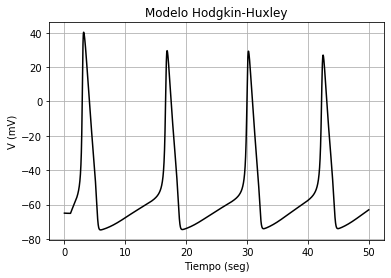

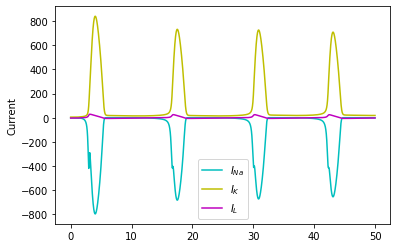

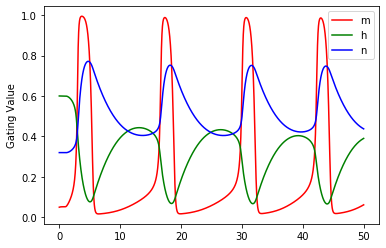

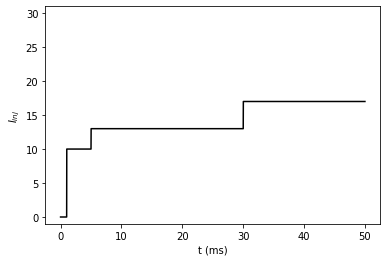

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Modelo Hodgkin-Huxley

# Constantes
C_m  =   1.0 # capacitancia de la membrana, uF/cm^2 (microfaradio/cm^2)
g_Na = 120.0 # maximum conducances, mS/cm^2 (milisiemens/cm^2)
g_K  =  36.0
g_L  =   0.3
V_Na = 50.0 # potenciales de equilibrio de Nernst, mV
V_K  = -77.0
V_L  = -54.387

# Cinética compuertas
# Funciones de potencial de membrana
def alpha_m(V): return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
def beta_m(V):  return 4.0*np.exp(-(V+65.0) / 18.0)
def alpha_h(V): return 0.07*np.exp(-(V+65.0) / 20.0)
def beta_h(V):  return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
def alpha_n(V): return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
def beta_n(V):  return 0.125*np.exp(-(V+65) / 80.0)

# Corrientes uA/cm^2 (microAmperes/cm^2)
#  Sodio
def I_Na(V,m,h):return g_Na * m**3 * h * (V - V_Na)
#  Potasio
def I_K(V, n):  return g_K  * n**4     * (V - V_K)
#  Leak
def I_L(V):     return g_L             * (V - V_L)

# Corriente externa
def I_inj(t): # 5 uA/cm^2
    return 10*(t>1) + 3*(t>5) + 4*(t>30)
    #return 5*(t>1)

# Tiempo sobre el que se integra
t = np.arange(0.0, 50.0, 0.01)

# Integra!
def dALLdt(X, t):
    V, m, h, n = X
    
    #calcula potencial de membrana & variables de activación
    dVdt = (I_inj(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt
V0 = -65 
m0 = 0.05
h0 = 0.6
n0 = 0.32

y0 =[V0,m0,h0,n0]    
X = odeint(dALLdt, y0, t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V,m,h)
ik = I_K(V, n)
il = I_L(V)

plt.figure()
plt.title('Modelo Hodgkin-Huxley')
plt.plot(t, V, 'k')
plt.grid()
plt.ylabel('V (mV)')
plt.xlabel('Tiempo (seg)')

plt.figure()
plt.plot(t, ina, 'c', label='$I_{Na}$')
plt.plot(t, ik, 'y', label='$I_{K}$')
plt.plot(t, il, 'm', label='$I_{L}$')
plt.ylabel('Current')
plt.legend()

plt.figure()
plt.plot(t, m, 'r', label='m')
plt.plot(t, h, 'g', label='h')
plt.plot(t, n, 'b', label='n')
plt.ylabel('Gating Value')
plt.legend()

plt.figure()
plt.plot(t, I_inj(t), 'k')
plt.xlabel('t (ms)')
plt.ylabel('$I_{inj}$')
plt.ylim(-1, 31)

plt.show()

Referencias para la parte histórica:

Mazana, J. SIR BERNARD KATZ, IN MEMORIAM. FRENIA, Vol. III-2-2003 [en línea] [fecha de consulta: 2017-09-04]
Disponible en:
<http://documentacion.aen.es/pdf/frenia/2003/fasciculo-2/161-sir-bernard-katz-in-memoriam.pdf>

Ramón, F., Hernández-Falcón, J. EL POTENCIAL DE ACCION. Historia de su Descubrimiento y Estudio. División de Posgrado e Investigación y Departamento de Fisiología. Facultad de Medicina. UNAM [en línea] [fecha de consulta: 2017-09-04]
Disponible en:
<https://cienciaescolar.files.wordpress.com/2009/07/el-potencial-de-accic3b3n.pdf>